# Guide to Network Analysis (Part 6 - Solve Location Allocation)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Why-is-location-so-important?" data-toc-modified-id="Why-is-location-so-important?-1.1">Why is location so important?</a></span></li><li><span><a href="#What-is-Location-Allocation-Analysis?" data-toc-modified-id="What-is-Location-Allocation-Analysis?-1.2">What is Location-Allocation Analysis?</a></span></li><li><span><a href="#The-API-Method" data-toc-modified-id="The-API-Method-1.3">The API Method</a></span></li><li><span><a href="#Problem-types" data-toc-modified-id="Problem-types-1.4">Problem types</a></span></li><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.5">Problem statement</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Define-Facilities-and-Demand-Points-Feature-Class" data-toc-modified-id="Define-Facilities-and-Demand-Points-Feature-Class-2.1">Define Facilities and Demand Points Feature Class</a></span></li><li><span><a href="#Set-up-the-properties-of-the-analysis" data-toc-modified-id="Set-up-the-properties-of-the-analysis-2.2">Set up the properties of the analysis</a></span><ul class="toc-item"><li><span><a href="#Facility-Type" data-toc-modified-id="Facility-Type-2.2.1">Facility Type</a></span></li><li><span><a href="#Weight" data-toc-modified-id="Weight-2.2.2">Weight</a></span></li></ul></li></ul></li><li><span><a href="#Example-1:-Maximize-Attendance" data-toc-modified-id="Example-1:-Maximize-Attendance-3">Example 1: Maximize Attendance</a></span><ul class="toc-item"><li><span><a href="#What-is-'Maximize-Attendance'?" data-toc-modified-id="What-is-'Maximize-Attendance'?-3.1">What is 'Maximize Attendance'?</a></span></li><li><span><a href="#Solving-Problem" data-toc-modified-id="Solving-Problem-3.2">Solving Problem</a></span><ul class="toc-item"><li><span><a href="#Tabularizing-the-response-from-solve_location_allocation" data-toc-modified-id="Tabularizing-the-response-from-solve_location_allocation-3.2.1">Tabularizing the response from solve_location_allocation</a></span></li><li><span><a href="#Visualizing-the-response-from-from-solve_location_allocation" data-toc-modified-id="Visualizing-the-response-from-from-solve_location_allocation-3.2.2">Visualizing the response from from solve_location_allocation</a></span></li></ul></li></ul></li><li><span><a href="#Example-2:-Maximize-Market-Share" data-toc-modified-id="Example-2:-Maximize-Market-Share-4">Example 2: Maximize Market Share</a></span><ul class="toc-item"><li><span><a href="#What-is-'Maximize-Market-Share'?" data-toc-modified-id="What-is-'Maximize-Market-Share'?-4.1">What is 'Maximize Market Share'?</a></span></li><li><span><a href="#Solving-Problem" data-toc-modified-id="Solving-Problem-4.2">Solving Problem</a></span></li></ul></li><li><span><a href="#Example-3:-Target-Market-Share" data-toc-modified-id="Example-3:-Target-Market-Share-5">Example 3: Target Market Share</a></span><ul class="toc-item"><li><span><a href="#What-is-'Target-Market-Share'?" data-toc-modified-id="What-is-'Target-Market-Share'?-5.1">What is 'Target Market Share'?</a></span></li><li><span><a href="#Solving-Problem" data-toc-modified-id="Solving-Problem-5.2">Solving Problem</a></span></li></ul></li><li><span><a href="#Example-4:-Minimize-Impedance-in-Async-Manner" data-toc-modified-id="Example-4:-Minimize-Impedance-in-Async-Manner-6">Example 4: Minimize Impedance in Async Manner</a></span><ul class="toc-item"><li><span><a href="#What-is-'Minimize-Impedance'?" data-toc-modified-id="What-is-'Minimize-Impedance'?-6.1">What is 'Minimize Impedance'?</a></span></li><li><span><a href="#What-is-Async?" data-toc-modified-id="What-is-Async?-6.2">What is Async?</a></span></li><li><span><a href="#Solving-Problem" data-toc-modified-id="Solving-Problem-6.3">Solving Problem</a></span></li><li><span><a href="#A-second-solver-in-arcgis.features.find_locations-module" data-toc-modified-id="A-second-solver-in-arcgis.features.find_locations-module-6.4">A second solver in arcgis.features.find_locations module</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li></ul></div>

## Introduction

Now we have learned about Network Datasets and Network Analysis Layer (NA Layer) in <a href="part1_introduction_to_network_analysis.ipynb">Part 1</a>, how to find routes from one point to another, and among multiple points in <a href="part2_find_routes.ipynb">Part 2</a>, how to generate service area in <a href="part3_generate_service_area.ipynb">Part 3</a>, how to find closest facility in <a href="part4_find_closest_facilities.ipynb">Part 4</a>, and how to create an Origin Destination Cost Matrix in <a href="part5_generate_od_cost_matrix.ipynb">Part 5</a>, let's move onto the sixth topic - how to `solve location allocation`. Please refer to the road map below if you want to revisit the previous topics or jump to the next topic -

 - Network Dataset and Network Analysis services (<a href="part1_introduction_to_network_analysis.ipynb">Part 1</a>) 
 - Find Routes (<a href="part2_find_routes.ipynb">Part 2</a>)
 - Generate Service Area (<a href="part3_generate_service_area.ipynb">Part 3</a>)
 - Find Closest Facility (<a href="part4_find_closest_facilities.ipynb">Part 4</a>)
 - Generate Origin Destination Cost Matrix (<a href="part5_generate_od_cost_matrix.ipynb">Part 5</a>)
 - Solve Location Allocation (You are here!)
 - Vehicle Routing Problem Service (<a href="part7_vehicle_routing_problem.ipynb">Part 7</a>)


### Why is location so important?

Location is often considered the most important factor leading to the success of a private- or public-sector organization. Private-sector organizations can profit from a good location, whether a small coffee shop with a local client or a multinational network of factories with distribution centers and a worldwide chain of retail outlets. 

Location can help keep fixed and overhead costs low and accessibility high. Public-sector facilities, such as schools, hospitals, libraries, fire stations, and emergency response services (ERS) centers, can provide high-quality service to the community at a low cost when a good location is chosen <a href="#References"> [1]</a>.


### What is Location-Allocation Analysis?

The location-allocation tool can be configured to solve specific problem types. Examples include the following:

 - A retail store wants to see which potential store locations would need to be developed to capture 10 percent of the retail market in the area.

 - A fire department wants to determine where it should locate fire stations to reach 90 percent of the community within a four-minute response time.

 - A police department wants to preposition personnel given past criminal activity at night.

 - After a storm, a disaster response agency wants to find the best locations to set up triage facilities, with limited patient capacities, to tend to the affected population.

The goal of `location-allocation` is to locate facilities in a way that supplies the demand points most efficiently, given facilities that provide goods and services and a set of demand points that consume them. "As the name suggests, location-allocation is a two-fold problem that simultaneously locates facilities and allocates demand points to the facilities"<a href="#References"> [2]</a>. A good Location-Allocation Analysis would meet the following requirements<a href="#References"> [3]</a>:
 - to minimize the overall distance between demand points and facilities, 
 - maximize the number of demand points covered within a certain distance of facilities, 
 - maximize an apportioned amount of demand that decays with increasing distance from a facility, 
 - or maximize the amount of demand captured in an environment of friendly and competing facilities.

The API of `Solve Location Allocation` is useful when you need to choose which facilities from a set of facilities to operate based on their potential interaction with demand points. Along with using the API, we will need to perform the following steps:
 - Extract the required input FeatureSets for the tool from FeatureLayerCollection items in the GIS.
 - Define a function to extract, symbolize, and display the output results from the API.

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/04_als_location_allocation_schematic.png" />

Fig 1. Using Location Allocation Analysis tools to find the optimized future site(s) for fire stations and the potential service areas (source: <a href="#References">[3]</a>). 

### The API Method

The ArcGIS API for Python provides two ways to solve the location allocation problems, which as shown in the table below:

| Operation       | network.analysis       | features.use_proximity |
|-----------------|------------------------|------------------------|
| Route           | find_routes            | plan_routes       |
| ServiceArea     | generate_service_areas | create_drive_time_areas|
| ClosestFacility | find_closest_facilities| find_nearest |
| OD Cost Matrix  | generate_origin_destination_cost_matrix| connect_origins_to_destinations |
| Location Allocation  | **solve_location_allocation**| **choose_best_facilities** |

These two methods are defined in different modules of the arcgis package, and will make distinct REST calls in the back end. A key separation from `network.analysis` to `features.use_proximity` is that the former provides full capabilities of solvers and runs faster, and the latter is workflow-driven and provides service-to-service I/O approach.

Defined in the `network.analysis` module, `solve_location_allocation` supports full capabilities of operations; while `choose_best_facilities` provides a workflow approach that user can input a feature service and get returned a feature service. We will walk through the data preparation, implementation, and visualization of output here.

### Problem types

Initially, it may appear that all location-allocation analyses solve the same problem, but the best location is not the same for all types of facilities. For instance, the best location for an ERS center is different than the best location for a manufacturing plant. Location-Allocation analysis solver offers seven different problem types to answer specific kinds of questions<a href="#References"> [1]</a>, as stated below:
 - Minimize Weighted Impedance (P-Median)
 - Maximize Coverage
 - Maximize Coverage and Minimize Facilities
 - Maximize Attendance
 - Maximize Market Share
 - Target Market Share
 - Maximize Capacitated Coverage

### Problem statement

Part 6 aims at showing how one can choose the optimal store locations based on the existing stores in the same brand, and in competitor brands, and also demand points which can be represented as population clusters in this case. Let's assume the user story is like this:

Jim is a GIS analyst in need to provide his customer - a chained Pizza Shop - new store locations that would generate the most business in the neighborhood. The main objective is to locate stores close to population centers, which provide demand for the stores, based on the premise that people tend to shop more at nearby stores than at those that are farther away. 

The location-allocation analysis will be performed differently for four different problem types: `maximize attendance`, `maximize market share`, `target market share` and `Minimize Impedance`. The differences among these problem types will become apparent as you follow the workflow stated below<a href="#References"> [4]</a>.

## Data Preparation

When you are ready, let's make your hands dirty with some real implementations! Getting started, let's first connect to a GIS instance.

In [1]:
from arcgis.gis import GIS
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, FeatureCollection, find_locations
import pandas as pd
import time
import datetime as dt

If you have already set up a profile to connect to your ArcGIS Online organization, execute the cell below to load the profile and create the GIS class object. If not, use a traditional username/password log-in e.g. `my_gis = GIS('https://www.arcgis.com', 'arcgis_python', 'P@ssword123', verify_cert=False, set_active=True)`

In [2]:
#my_gis = GIS('home')
my_gis = GIS('https://www.arcgis.com', 'arcgis_python', 'P@ssword123', verify_cert=False, set_active=True)

Then we need to access and/or explore the input dataset (in this case, the `facilities` and `demand points` feature class).

### Define Facilities and Demand Points Feature Class

At least one facility and one demand point need to be set as input to successfully execute the tool. You can load up to 1,000 facilities and 10,000 demand points.

A previously published `Feature Service` which contains pizza store locations and the census tract information for the San Francisco Downtown is to be used here for `facilities` and `demand points` feature classes.

<Item title:"Pick_Pizza_Shops_San_Francisco" type:Feature Layer Collection owner:api_data_owner>
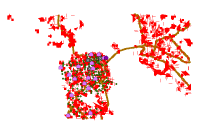

In [3]:
try:
    sf_item = my_gis.content.get("6e757aa31942469fb91dd84ad53b8485")
    display(sf_item)
except RuntimeError as re:
    print("You dont have access to the item.")

First, we need to get the candidate store locations - these are the potential places to open a new store. The solution from the location-allocation analysis process will include a subset of these stores.

In [5]:
for lyr in sf_item.layers:
    print(lyr.properties.name)

ExistingStore
CandidateStores
CompetitorStores
TractCentroids
Restricted Turns
Highways


In [8]:
candidate_fl = sf_item.layers[1]
try:
    candidate_facilities = candidate_fl.query(where="1=1", as_df=False)
    display(candidate_facilities)
except RuntimeError as re:
    print("Query failed.")

<FeatureSet> 16 features

Stores need to be located to best service the existing populations. A point layer of `census tract centroids` is a good fit to represent `demand points`.

In [9]:
demand_points_fl = sf_item.layers[3]
try:
    demand_points = demand_points_fl.query(where="1=1", as_df=False)
    display(demand_points)
except RuntimeError as re:
    print("Query failed.")

<FeatureSet> 208 features

Also, to note that, there are already existing stores in the study area. Considering the existing stores as `required facilities` layer will help eliminate competitions between the new store and the existing stores of the same brand, hence to fulfill the store-expansion requirements.

In [10]:
existing_fl = sf_item.layers[0]
try:
    required_facilities = existing_fl.query(where="1=1", as_df=False)
    display(required_facilities)
except RuntimeError as re:
    print("Query failed.")

<FeatureSet> 1 features

The location-allocation tool can also locate new stores to maximize the market share in light of competing stores. Here, the market share is computed using a Huff, or Gravity Model. One last input data needed for the market share scenario is the `competitor` layer, which in this case, means existing pizza stores from other brands.

In [11]:
competitor_fl = sf_item.layers[2]
try:
    competitor_facilities = competitor_fl.query(where="1=1", as_df=False)
    display(competitor_facilities)
except RuntimeError as re:
    print("Query failed.")

<FeatureSet> 3 features

### Set up the properties of the analysis

Having the `facilities` and `demand points` defined as above is already sufficient for the basic functions of solving location allocation analysis. However, if you want to involve complicated models, for example, to take existing stores into consideration, or to beat competition from other pizza stores, here is something you need to:

1. Specify whether the facility is a candidate, required, or a competitor facility. The field value is specified as one of the following integers (use the numeric code, not the name in parentheses):

 - 0 (Candidate)—A facility that may be part of the solution.
 - 1 (Required)—A facility that must be part of the solution.
 - 2 (Competitor)—A rival facility that potentially removes demand from your facilities. Competitor facilities are specific to the `Maximize Market Share` and `Target Market Share` problem types; they are ignored in other problem types.


2. Specify Weight for the demands points feature class.

 - The relative weighting of the demand point. A value of 2.0 means the demand point is twice as important as one with a weight of 1.0. If demand points represent households, for example, weight could indicate the number of people in each household. In this case, the population of each census tract is applied as weight.
 

3. Choose the correct `problem type` per analysis - problem types are often referred to as models. For example, `Maximize attendance` is a good problem type for choosing retail store locations, since it assumes that all stores are equally attractive and people are more likely to shop at nearby stores.

Further explanations to the specifications of the input arguments of the API method can be found in the <a href="https://logistics.arcgis.com/arcgis/rest/directories/arcgisoutput/World/LocationAllocation_GPServer/World_LocationAllocation/SolveLocationAllocation.htm">help doc of REST API</a>.

#### Facility Type

In order to specify `facility type` per feature in the `facilities` feature set, we will need to:
 - First, assign the `candidate`, `required`, and `competitor` facilities a new field called `FacilityType`.
 - Next, in preparation to append all three facilities feature sets into one, we need to change the object id fields for entries with the duplicate object ids, e.g. the one and only feature inside the `required_facilities`, `{'OBJECTID': 1, 'NAME': 'Existing Store', 'FacilityType': 1}` to be changed into new `OBJECTID` (which is 17 in this case).
 - Lastly, merge these three feature sets into a new feature set.

In [12]:
object_id_count = 0

for f in candidate_facilities:
    object_id_count+=1
    f.attributes.update({"FacilityType":0})
    print(f.attributes)

{'OBJECTID': 1, 'NAME': 'Store_1', 'FacilityType': 0}
{'OBJECTID': 2, 'NAME': 'Store_2', 'FacilityType': 0}
{'OBJECTID': 3, 'NAME': 'Store_3', 'FacilityType': 0}
{'OBJECTID': 4, 'NAME': 'Store_4', 'FacilityType': 0}
{'OBJECTID': 5, 'NAME': 'Store_5', 'FacilityType': 0}
{'OBJECTID': 6, 'NAME': 'Store_6', 'FacilityType': 0}
{'OBJECTID': 7, 'NAME': 'Store_7', 'FacilityType': 0}
{'OBJECTID': 8, 'NAME': 'Store_11', 'FacilityType': 0}
{'OBJECTID': 9, 'NAME': 'Store_12', 'FacilityType': 0}
{'OBJECTID': 10, 'NAME': 'Store_13', 'FacilityType': 0}
{'OBJECTID': 11, 'NAME': 'Store_14', 'FacilityType': 0}
{'OBJECTID': 12, 'NAME': 'Store_15', 'FacilityType': 0}
{'OBJECTID': 13, 'NAME': 'Store_16', 'FacilityType': 0}
{'OBJECTID': 14, 'NAME': 'Store_17', 'FacilityType': 0}
{'OBJECTID': 15, 'NAME': 'Store_18', 'FacilityType': 0}
{'OBJECTID': 16, 'NAME': 'Store_19', 'FacilityType': 0}


In [13]:
for f in required_facilities:
    object_id_count+=1
    f.attributes.update({"FacilityType":1, "OBJECTID":object_id_count})
    print(f.attributes)

{'OBJECTID': 17, 'NAME': 'Existing Store', 'FacilityType': 1}


In [14]:
for f in competitor_facilities:
    object_id_count+=1
    f.attributes.update({"FacilityType":2, "OBJECTID":object_id_count})
    print(f.attributes)

{'OBJECTID': 18, 'NAME': 'Competitor_1', 'FacilityType': 2}
{'OBJECTID': 19, 'NAME': 'Competitor_2', 'FacilityType': 2}
{'OBJECTID': 20, 'NAME': 'Competitor_3', 'FacilityType': 2}


In [15]:
facilities_flist = []

for ea in candidate_facilities:
    facilities_flist.append(ea)

for ea in required_facilities:
    facilities_flist.append(ea)
    
for ea in competitor_facilities:
    facilities_flist.append(ea)

facilities = FeatureSet(facilities_flist)
display(facilities)

<FeatureSet> 20 features

In [16]:
for f in facilities:
    print(f.attributes)

{'OBJECTID': 1, 'NAME': 'Store_1', 'FacilityType': 0}
{'OBJECTID': 2, 'NAME': 'Store_2', 'FacilityType': 0}
{'OBJECTID': 3, 'NAME': 'Store_3', 'FacilityType': 0}
{'OBJECTID': 4, 'NAME': 'Store_4', 'FacilityType': 0}
{'OBJECTID': 5, 'NAME': 'Store_5', 'FacilityType': 0}
{'OBJECTID': 6, 'NAME': 'Store_6', 'FacilityType': 0}
{'OBJECTID': 7, 'NAME': 'Store_7', 'FacilityType': 0}
{'OBJECTID': 8, 'NAME': 'Store_11', 'FacilityType': 0}
{'OBJECTID': 9, 'NAME': 'Store_12', 'FacilityType': 0}
{'OBJECTID': 10, 'NAME': 'Store_13', 'FacilityType': 0}
{'OBJECTID': 11, 'NAME': 'Store_14', 'FacilityType': 0}
{'OBJECTID': 12, 'NAME': 'Store_15', 'FacilityType': 0}
{'OBJECTID': 13, 'NAME': 'Store_16', 'FacilityType': 0}
{'OBJECTID': 14, 'NAME': 'Store_17', 'FacilityType': 0}
{'OBJECTID': 15, 'NAME': 'Store_18', 'FacilityType': 0}
{'OBJECTID': 16, 'NAME': 'Store_19', 'FacilityType': 0}
{'OBJECTID': 17, 'NAME': 'Existing Store', 'FacilityType': 1}
{'OBJECTID': 18, 'NAME': 'Competitor_1', 'FacilityType': 2

#### Weight

Next, let's specify a new field `Weight` for the demands points feature class. Here, we will use the population per census tract as the weight factor.

In [17]:
for f in demand_points:
    tmp = f.get_value("POP2000")
    f.attributes.update({"Weight":tmp})

As mentioned previously, the best location is not the same for all problem types. For instance, the best location for an ERS center is different than the best location for a manufacturing plant.

Next, We will walk through four examples that each one uses the same input feature classes, but yet create different output in fulfilling various needs.

## Example 1: Maximize Attendance

### What is 'Maximize Attendance'?

When the `problem_type` is set to `Maximize Attendance`, Facilities are chosen such that as much demand weight as possible is allocated to facilities while assuming the demand weight decreases in relation to the distance between the facility and the demand point <a href="#References">[5]</a>.

Specialty stores that have little or no competition benefit from this problem type, but it may also be beneficial to general retailers and restaurants that don't have the data on competitors necessary to perform market share problem types. Some businesses that might benefit from this problem type include coffee shops, fitness centers, dental and medical offices, and electronics stores. Public transit bus stops are often chosen with the help of Maximize Attendance. Maximize Attendance assumes that the farther people have to travel to reach your facility, the less likely they are to use it. This is reflected in how the amount of demand allocated to facilities diminishes with distance <a href="#References">[5]</a>.

The following list describes how the Maximize Attendance problem handles demand:

 - A demand point that cannot reach any facilities due to a cutoff distance or time is not allocated.
 - When a demand point can reach a facility, its demand weight is only partially allocated to the facility. The amount allocated decreases as a function of the maximum cutoff distance (or time) and the travel distance (or time) between the facility and the demand point.
 - The weight of a demand point that can reach more than one facility is proportionately allocated to the nearest facility only.
 
 
### Solving Problem

First solver we will showcase here is the `arcgis.network.analysis.solve_location_allocation` tool, and the important parameters for this tool include:

 - `Cutoff`- Specify the travel time or travel distance value at which to stop searching for destinations from the origin. Any destination beyond the cutoff value will not be considered. The value needs to be in the units specified by the Time Units parameter if the impedance attribute in your travel mode is time based or in the units specified by the Distance Units parameter if the impedance attribute in your travel mode is distance based. If a value is not specified, the tool will not enforce any travel time or travel distance limit when searching for destinations.

 - `measurement_transformation_model`: Measurement Transformation Model (str). Optional parameter.  This sets the equation for transforming the network cost between facilities and demand points. This property, coupled with the Impedance Parameter, specifies how severely the network impedance between facilities and demand points influences the solver's choice of facilities. If needed, pick from ['Linear', 'Power', 'Exponential']
   - ArcGIS will use a linear decay in calculating people's propensity to visit a store. That is, with a five-minute impedance cutoff and a linear impedance transformation, the probability of visiting a store decays at 1/5, or 20 percent; therefore, a store one minute away from a demand point has an 80 percent probability of a visit compared to a store four minutes away, which only has a 20 percent probability <a href="#References">[4]</a>.

 - You can set `save_output_network_analysis_layer` to True if you want to output the resulting NA layer as Layer file, though this process can take up more computation time <a href="#References">[4]</a>.

In [15]:
%%time

result1 = network.analysis.solve_location_allocation(   problem_type='Maximize Attendance',
                                                        travel_direction='Demand to Facility',
                                                        number_of_facilities_to_find='3',
                                                        measurement_transformation_model="Linear",
                                                        measurement_transformation_factor=2,
                                                        demand_points=demand_points,
                                                        facilities=candidate_facilities,
                                                        measurement_units='Minutes',
                                                        default_measurement_cutoff=5
                                                    )
print('Analysis succeeded? {}'.format(result1.solve_succeeded))

Analysis succeeded? True
Wall time: 10.3 s


In [16]:
result1

ToolOutput(solve_succeeded=True, output_allocation_lines=<FeatureSet> 36 features, output_facilities=<FeatureSet> 16 features, output_demand_points=<FeatureSet> 208 features, output_network_analysis_layer=None, output_result_file=None)

#### Tabularizing the response from solve_location_allocation

Now, let's explore the tabularized output from `solve_location_allocation`:

In [19]:
# Display the analysis results in a pandas dataframe.
result1.output_facilities.sdf[['Name', 'FacilityType', 
                               'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]

,Name,FacilityType,Weight,DemandCount,DemandWeight,TotalWeighted_Minutes,Total_Minutes
0,Store_1,0,1,0,0.000000,0.000000,0.000000
1,Store_2,0,1,0,0.000000,0.000000,0.000000
2,Store_3,0,1,0,0.000000,0.000000,0.000000
3,Store_4,0,1,0,0.000000,0.000000,0.000000
4,Store_5,0,1,0,0.000000,0.000000,0.000000
5,Store_6,0,1,0,0.000000,0.000000,0.000000
6,Store_7,0,1,0,0.000000,0.000000,0.000000
7,Store_11,0,1,0,0.000000,0.000000,0.000000
8,Store_12,3,1,9,3.482893,9.709353,27.585533
9,Store_13,3,1,12,4.086782,9.584877,39.566089


Looking at the `FacilityType` column of the output table above, we can see that **Store_12, Store_13, and Store_15** are marked as numeric code 3 (Chosen) - which means these are the optimized selection after running the specified model.

`DemandCount` - This field contains a count of demand points allocated to the facility. A nonzero value means the facility was chosen as part of the solution.

`DemandWeight` - This field contains a sum of the effective weight from all demand points allocated to the facility. The value is a sum of all the Weight values from the demand points allocated to the facility. In the case of the `Maximize Attendance` and `Maximize Market Share` problem types, the value is an apportioned sum of the Weight field values, since these problem types allow demand to decay with distance or be split among many facilities<a href="#References"> [1]</a>.

#### Visualizing the response from from solve_location_allocation

To improve the re-usablity of codes, we will wrap up the lines for visualizing returned results into an individual function called `visualize_locate_allocate_result`:

In [77]:
# Import the ArcGIS API for Python
from arcgis import *
from IPython.display import display

# Define a function to display the output analysis results in a map
def visualize_locate_allocate_results(map_widget, solve_locate_allocate_result, zoom_level):
    # The map widget
    m = map_widget
    # The locate-allocate analysis result
    result = solve_locate_allocate_result
    
    # 1. Parse the locate-allocate analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    demand_df = result.output_demand_points.sdf
    lines_df = result.output_allocation_lines.sdf

    # Extract the allocated demand points (pop) data.
    demand_allocated_df = demand_df[demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_allocated_fset = features.FeatureSet.from_dataframe(demand_allocated_df)

    # Extract the un-allocated demand points (pop) data.
    demand_not_allocated_df = demand_df[~demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    if len(demand_not_allocated_df)>0:
        demand_not_allocated_fset = features.FeatureSet.from_dataframe(demand_not_allocated_df)

    # Extract the chosen facilities (candidate sites) data.
    facilities_df = result.output_facilities.sdf[['Name', 'FacilityType', 
                                                 'Weight','DemandCount', 'DemandWeight', 'SHAPE']]
    facilities_chosen_df = facilities_df[facilities_df['FacilityType'] == 3]
    facilities_chosen_fset = features.FeatureSet.from_dataframe(facilities_chosen_df)

    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    # Patient points within 90 minutes drive time to a proposed location.
    allocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/cool/1.png',
                               'contentType' : 'image/png', 'width' : 26, 'height' : 26,
                               'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Patient points outside of a 90 minutes drive time to a proposed location.
    unallocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/warm/1.png',
                                 'contentType' : 'image/png', 'width' : 19.5, 'height' : 19.5,
                                 'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Selected facilities
    selected_facilities_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                                  "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Pizza.png",
                                  "contentType":"image/png","width":13,"height":13}
    
    # 3. Display the analysis results in the map
    
    # Zoom out to display all of the allocated census points.
    m.zoom = zoom_level
    
    # Display the locations of pop within the specified drive time to the selected site(s).
    m.draw(shape=demand_allocated_fset, symbol=allocated_demand_symbol)

    # Display the locations of pop outside the specified drive time to the selected site(s).
    if len(demand_not_allocated_df)>0:
        m.draw(shape = demand_not_allocated_fset, symbol = unallocated_demand_symbol)

    # Display the chosen site.
    m.draw(shape=facilities_chosen_fset, symbol=selected_facilities_symbol)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_1)


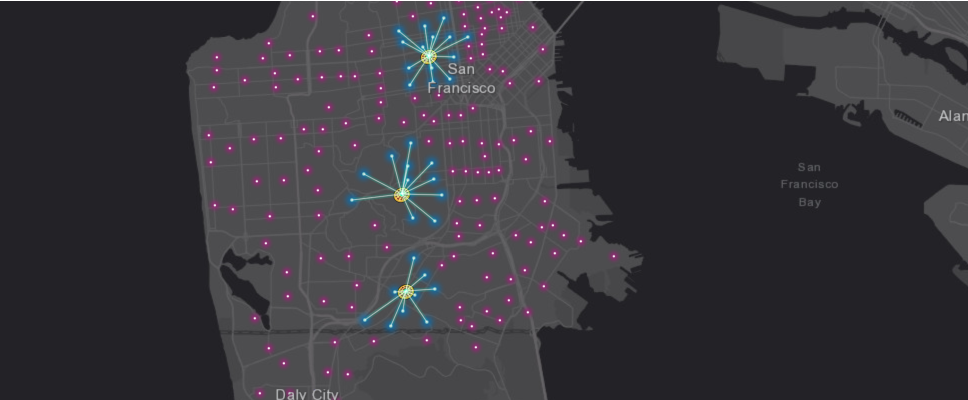

In [27]:
# Display the analysis results in a map.

# Create a map of SF, California.
map1 = my_gis.map('San Francisco, CA')
map1.basemap = 'dark-gray'
map1

In [25]:
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_locate_allocate_results(map1, result1, zoom_level=8)

In [26]:
item_properties = {
    "title": "Location Allocation example of Pizza Stores in San Francisco",
    "tags" : "Location Allocation",
    "snippet": "Location Allocation example of Pizza Stores in San Francisco",
    "description": "a web map of Location Allocation example of Pizza Stores in San Francisco"
}

item = map1.save(item_properties)
item

<Item title:"Location Allocation example of Pizza Stores in San Francisco" type:Web Map owner:arcgis_python>

Next, let's look at other examples with different goals in solving the problem.

## Example 2: Maximize Market Share

### What is 'Maximize Market Share'?

`Maximize Market Share`—A specific number of facilities are chosen such that the allocated demand is maximized in the presence of competitors. The goal is to capture as much of the total market share as possible with a given number of facilities, which you specify. The total market share is the sum of all demand weight for valid demand points.
The market share problem types require the most data because, along with knowing your own facilities' weight, you also need to know that of your competitors' facilities. The same types of facilities that use the Maximize Attendance problem type can also use market share problem types given that they have comprehensive information that includes competitor data. Large discount stores typically use Maximize Market Share to locate a finite set of new stores. The market share problem types use a Huff model, which is also known as a gravity model or spatial interaction <a href="#References">[5]</a>.

The following list describes how the Maximize Market Share problem handles demand:

 - A demand point that cannot reach any facilities due to a cutoff distance or time is not allocated.
 - A demand point that can only reach one facility has all its demand weight allocated to that facility.
 - A demand point that can reach two or more facilities has all its demand weight allocated to them; furthermore, the weight is split among the facilities proportionally to the facilities' attractiveness (facility weight) and inversely proportional to the distance between the facility and demand point. Given equal facility weights, this means more demand weight is assigned to near facilities than far facilities.

The `total market share`, which can be used to calculate the captured market share, is the sum of the weight of all valid demand points.

### Solving Problem

`Number_of_Facilities_to_Find ` - Specify the number of facilities the solver should choose. The default value is 1.

 - The facilities with a FacilityType field value of 1 (Required) are always chosen first. Any excess facilities to choose are picked from candidate facilities.

 - Any facilities that have a FacilityType value of 3 (Chosen) before solving are treated as candidate facilities at solve time.

 - If the number of facilities to find is less than the number of required facilities, an error occurs.

Number of Facilities to Find is disabled for the `Minimize Facilities` and `Target Market Share` problem types since the solver determines the minimum number of facilities needed to meet the objectives.

So we are giving the `Number_of_Facilities_to_Find` a value of 4 here, since the analysis will first count the existing store and we need to retain 3 more spots for the candidate locations.

In [28]:
result1b = network.analysis.solve_location_allocation(  problem_type='Maximize Market Share', 
                                                        facilities=facilities, 
                                                        demand_points=demand_points,
                                                        number_of_facilities_to_find=4,
                                                        measurement_transformation_model="Power",
                                                        measurement_transformation_factor=2,
                                                        travel_direction='Demand to Facility',
                                                        impedance="TravelTime",
                                                        measurement_units='Minutes', 
                                                        default_measurement_cutoff=5
                                                    )

print('Solve succeeded? {}'.format(result1b.solve_succeeded))

WARNING 030194: Data values longer than 500 characters for field [Facilities:Name] are truncated.


Solve succeeded? True


In [30]:
# Display the analysis results in a pandas dataframe.
result1b.output_facilities.sdf[['Name', 'FacilityType', 
                                'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]

,Name,FacilityType,Weight,DemandCount,DemandWeight,TotalWeighted_Minutes,Total_Minutes
0,Store_1,0,1,0,0.000000,0.000000,0.000000
1,Store_2,0,1,0,0.000000,0.000000,0.000000
2,Store_3,3,1,10,9.069122,30.188611,33.921783
3,Store_4,0,1,0,0.000000,0.000000,0.000000
4,Store_5,0,1,0,0.000000,0.000000,0.000000
5,Store_6,0,1,0,0.000000,0.000000,0.000000
6,Store_7,0,1,0,0.000000,0.000000,0.000000
7,Store_11,0,1,0,0.000000,0.000000,0.000000
8,Store_12,0,1,0,0.000000,0.000000,0.000000
9,Store_13,0,1,0,0.000000,0.000000,0.000000


Looking at the `FacilityType` column of the output table above, we can see that **Store_3, Store_14, and Store_15** are marked as numeric code 3 (Chosen) - which means these are the optimized selection after running the specified model.

`Total_Minutes` - This field contains a sum of network costs between the facility and each of the demand points allocated to the facility. The [Impedance] portion of the field name is replaced with the network attribute name, for example, Total_Minutes, where Minutes is the name of the network attribute.

`TotalWeighted_Minutes` - This field stores the cumulative weighted cost for a facility. The weighted cost for a demand point is its weight multiplied by the least-cost path between the facility and the demand point. The weighted cost for a facility is the sum of all the weighted costs of demand points allocated to the facility. For example, if a demand point with a weight of two is allocated to a facility 10 minutes of drive away, the TotalWeighted_Minutes value is 20 (2 x 10). If another demand point with a weight of three is allocated to the same facility and is 5 minutes of drive away, the TotalWeighted_Minutes value increases to 35 (3 x 5 + 20).


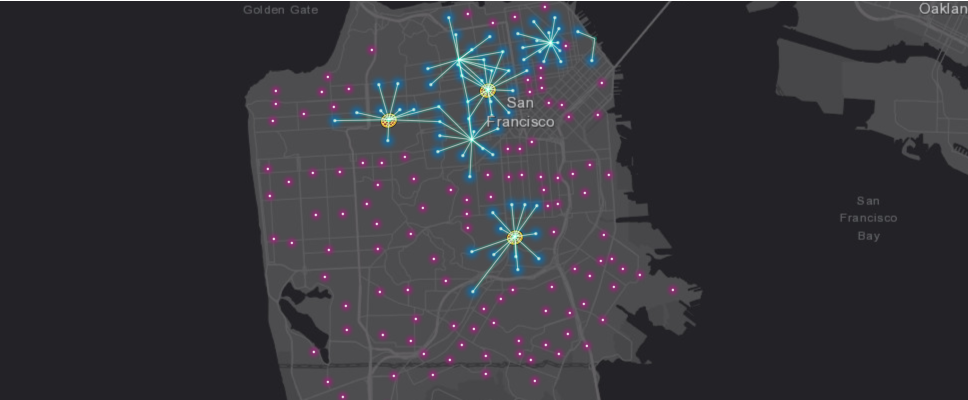

In [33]:
# Display the analysis results in a map.

# Create a map of SF, California.
map1b = my_gis.map('San Francisco, CA')
map1b.basemap = 'dark-gray'
map1b

In [32]:
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_locate_allocate_results(map1b, result1b, zoom_level=8)

Note that the sites with pizza symbols are the newly chosen store locations. The existing stores and the competitor stores are also shown as the centers of rays.

In [34]:
item_properties['title'] += " (2)"

item = map1b.save(item_properties)
item

<Item title:"Location Allocation example of Pizza Stores in San Francisco (2)" type:Web Map owner:arcgis_python>

## Example 3: Target Market Share


### What is 'Target Market Share'?

`Target Market Share` — Target Market Share chooses the minimum number of facilities necessary to capture a specific percentage of the total market share in the presence of competitors. The total market share is the sum of all demand weight for valid demand points. You set the percent of the market share you want to reach and let the solver choose the fewest number of facilities necessary to meet that threshold <a href="#References">[5]</a>.

The market share problem types require the most data because, along with knowing your own facilities' weight, you also need to know that of your competitors' facilities. The same types of facilities that use the Maximize Attendance problem type can also use market share problem types given that they have comprehensive information that includes competitor data.

Large discount stores typically use the Target Market Share problem type when they want to know how much expansion would be required to reach a certain level of the market share or see what strategy would be needed just to maintain their current market share given the introduction of new competing facilities. The results often represent what stores would like to do if budgets weren't a concern. In other cases where budget is a concern, stores revert to the Maximize Market Share problem and simply capture as much of the market share as possible with a limited number of facilities.

The following list describes how the target market share problem handles demand:
 - The total market share, which is used in calculating the captured market share, is the sum of the weight of all valid demand points.
 - A demand point that cannot reach any facilities due to a cutoff distance or time is not allocated.
 - A demand point that can only reach one facility has all its demand weight allocated to that facility.
 - A demand point that can reach two or more facilities has all its demand weight allocated to them; furthermore, the weight is split among the facilities proportionally to the facilities' attractiveness (facility weight) and inversely proportional to the distance between the facility and demand point. Given equal facility weights, this means more demand weight is assigned to near facilities than far facilities.


### Solving Problem

`target_market_share` - This parameter is specific to the Target Market Share problem type. It is the percentage of the total demand weight that you want the chosen and required facilities to capture. The solver chooses the minimum number of facilities needed to capture the target market share specified here. The default value is 10 percent.

Note that, because there are competitor stores in the area that already took up some of the market share, setting the market share as 100 is not realistic. In doing so, a warning message is rendered - "Market share attained: 48.7194894610517 percent." Which means the best situation (when all candidate stores are established) the attained market share could only be 48.7195%.

In [35]:
result2b = network.analysis.solve_location_allocation(  problem_type='Target Market Share', 
                                                        target_market_share=100,
                                                        facilities=facilities, 
                                                        demand_points=demand_points,
                                                        travel_direction='Demand to Facility',
                                                        measurement_units='Minutes', 
                                                        default_measurement_cutoff=5
                                                    )

print('Solve succeeded? {}'.format(result2b.solve_succeeded))

Market share attained: 48.7194894610517 percent.


Solve succeeded? True


In [36]:
# Display the analysis results in a table.
# Display the analysis results in a pandas dataframe.
result2b.output_facilities.sdf[['Name', 'FacilityType', 
                               'Weight','DemandCount', 'DemandWeight', 'SHAPE']]

,Name,FacilityType,Weight,DemandCount,DemandWeight,SHAPE
0,Store_1,3,1,5,4.472718,"{'x': -122.51001818199995, 'y': 37.77236363700..."
1,Store_2,3,1,9,7.364822,"{'x': -122.48887272699994, 'y': 37.75376363600..."
2,Store_3,3,1,10,8.562101,"{'x': -122.46492727299994, 'y': 37.77472727300..."
3,Store_4,3,1,8,5.608236,"{'x': -122.47394545399999, 'y': 37.74316363600..."
4,Store_5,3,1,7,5.036518,"{'x': -122.44929090899996, 'y': 37.73154545500..."
5,Store_6,3,1,3,3.000000,"{'x': -122.49174545399995, 'y': 37.64930909100..."
6,Store_7,3,1,6,6.000000,"{'x': -122.48318181799999, 'y': 37.70110909100..."
7,Store_11,3,1,6,6.000000,"{'x': -122.43378181799994, 'y': 37.65536363600..."
8,Store_12,3,1,9,8.400668,"{'x': -122.43898181799995, 'y': 37.71923636400..."
9,Store_13,3,1,12,9.098768,"{'x': -122.44021818099998, 'y': 37.74538181800..."


As shown in the table above, in order to reach a 48.7195% market share, all the 16 candidate stores are chosen as new sites, which in reality would not happen.

So setting up a practical goal here, we are to set `target_market_share` to be 33.34(%), targeting to reach at least 1/3 of the market share.

In [37]:
result2 = network.analysis.solve_location_allocation(   problem_type='Target Market Share', 
                                                        target_market_share=33.34,
                                                        facilities=facilities, 
                                                        demand_points=demand_points,
                                                        travel_direction='Demand to Facility',
                                                        measurement_units='Minutes', 
                                                        default_measurement_cutoff=5
                                                    )

print('Solve succeeded? {}'.format(result2.solve_succeeded))

WARNING 030194: Data values longer than 500 characters for field [Facilities:Name] are truncated.


Solve succeeded? True


In [143]:
result2

ToolOutput(solve_succeeded=True, output_allocation_lines=<FeatureSet> 123 features, output_facilities=<FeatureSet> 20 features, output_demand_points=<FeatureSet> 208 features, output_network_analysis_layer=None, output_result_file=None)

In [144]:
# Display the analysis results in a table.
# Display the analysis results in a pandas dataframe.
result2.output_facilities.sdf[['Name', 'FacilityType', 
                                'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]

,Name,FacilityType,Weight,DemandCount,DemandWeight,SHAPE
0,Store_1,0,1,0,0.000000,"{'x': -122.51001818199995, 'y': 37.77236363700..."
1,Store_2,3,1,9,9.000000,"{'x': -122.48887272699994, 'y': 37.75376363600..."
2,Store_3,3,1,10,9.034819,"{'x': -122.46492727299994, 'y': 37.77472727300..."
3,Store_4,0,1,0,0.000000,"{'x': -122.47394545399999, 'y': 37.74316363600..."
4,Store_5,0,1,0,0.000000,"{'x': -122.44929090899996, 'y': 37.73154545500..."
5,Store_6,0,1,0,0.000000,"{'x': -122.49174545399995, 'y': 37.64930909100..."
6,Store_7,3,1,6,6.000000,"{'x': -122.48318181799999, 'y': 37.70110909100..."
7,Store_11,3,1,6,6.000000,"{'x': -122.43378181799994, 'y': 37.65536363600..."
8,Store_12,3,1,9,8.598420,"{'x': -122.43898181799995, 'y': 37.71923636400..."
9,Store_13,3,1,12,9.730473,"{'x': -122.44021818099998, 'y': 37.74538181800..."


From the output table above, we can see that in order to reach a 1/3 market share, at least 8 stores, namely Store_2, Store_3, Store_7, Store_11, Store_12, Store_13, Store_14, and Store_15 are chosen as new sites.


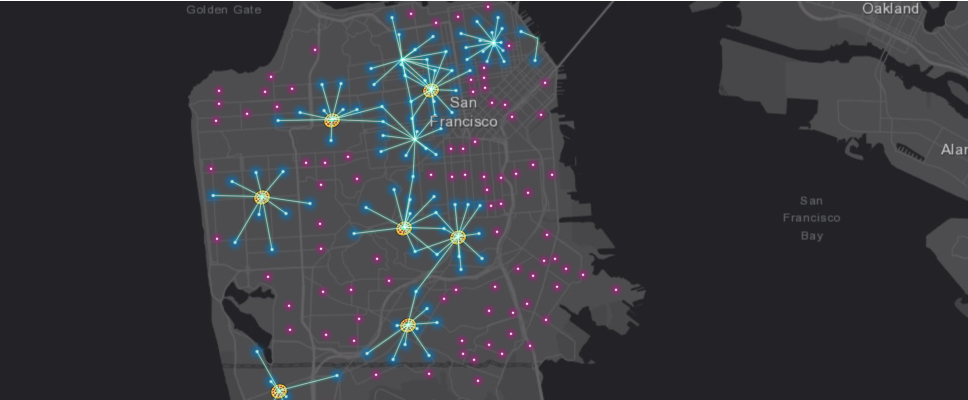

In [40]:
# Display the analysis results in a map.

# Create a map of Visalia, California.
map2 = my_gis.map('San Francisco, CA')
map2.basemap = 'dark-gray'
map2

In [39]:
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_locate_allocate_results(map2, result2, zoom_level=8)

The 8 chosen sites are symbolized with pizza symbols. The existing stores and the competitor stores are also shown as the centers of rays.

In [41]:
item_properties['title'] = "Location Allocation example of Pizza Stores in San Francisco (3)"

item = map2.save(item_properties)
item

<Item title:"Location Allocation example of Pizza Stores in San Francisco (3)" type:Web Map owner:arcgis_python>

## Example 4: Minimize Impedance in Async Manner


### What is 'Minimize Impedance'?

`Minimize Impedance` — This is also known as the P-Median problem type. Facilities are located such that the sum of all weighted travel time or distance between demand points and solution facilities is minimized. (Weighted travel is the amount of demand allocated to a facility multiplied by the travel distance or time to the facility.) <a href="#References"> [5]</a>

This problem type is traditionally used to locate warehouses, because it can reduce the overall transportation costs of delivering goods to outlets. Since Minimize Impedance reduces the overall distance the public needs to travel to reach the chosen facilities, the minimize impedance problem without an impedance cutoff is ordinarily regarded as more equitable than other problem types for locating some public-sector facilities such as libraries, regional airports, museums, department of motor vehicles offices, and health clinics.

The following list describes how the minimize impedance problem type handles demand:

 - A demand point that cannot reach any facilities due to setting a cutoff distance or time is not allocated.
 - A demand point that can only reach one facility has all its demand weight allocated to that facility.
 - A demand point that can reach two or more facilities has all its demand weight allocated to the nearest facility only.
 

### What is Async?
 
Asynchronous and synchronous modes define how the application interacts with the service and gets the results. <a href="#References"> [3]</a>

`Synchronous execution mode`: the application must wait for the request to finish and get the results. This execution mode is well-suited for requests that complete quickly (under 10 seconds).

`Asynchronouse execution mode`: the client must periodically check whether the service has finished execution and, once completed, retrieve the results. While the service is executing, the application is available to do other things. This execution mode is well-suited for requests that take a long time to complete because it allows users to continue to interact with the application while the results are generated.
 
### Solving Problem

Here, in order to achieve the goal that the sum of all weighted travel distance between demand points and solution facilities is minimized, we need to set the `impedance` and `measurement_units` to `Kilometers` (Length measurements along roads are stored in kilometers and can be used for performing analysis based on shortest distance).

Also, `future` is set to True here to enable the tool to be run an asynchronous manner. When using synchronous network analysis services, you get back a Python dictionary with all the information you may need such as routes, stops, barriers, and directions. In contrast, when using `asynchronous` network analysis services, the result object returned is of `ToolOutput` type. This object has several properties associated with it.

In [44]:
if_async = True

In [64]:
result3 = network.analysis.solve_location_allocation(   problem_type='Minimize Impedance', 
                                                        facilities=candidate_facilities, 
                                                        demand_points=demand_points,
                                                        number_of_facilities_to_find=3,
                                                        travel_direction='Demand to Facility',
                                                        impedance="Kilometers",
                                                        measurement_units='Kilometers', 
                                                        default_measurement_cutoff=100,
                                                        future=if_async
                                                    )

When `if_async` is set to True, you are free to skip the following six cells for now, and go on to execute cells in the next section - The cell above will be running in back stage, and when you are done with the next section, you can come back at the cell below to check if the async process is finished. 

If the printout results is `Async job not done yet!`, which means the backstage solver isn't finished at this point, you can again skip the five cells right after, and go on the execute cells in the section after the previously executed ones.

This workflow aims to perform parallel tasks at the wait time of the async process.

In [69]:
if if_async:
    if result3.done():
        result3 = result3.result()
        print("Async job done!")
    else:
        print("Async job not done yet!")

Async job done!


In [70]:
print('Solve succeeded? {}'.format(result3.solve_succeeded))

Solve succeeded? True


In [71]:
# Display the analysis results in a table.
# Display the analysis results in a pandas dataframe.
result3.output_facilities.sdf[['Name', 'FacilityType', 
                                'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Kilometers', 'Total_Kilometers']]

,Name,FacilityType,Weight,DemandCount,DemandWeight,TotalWeighted_Kilometers,Total_Kilometers
0,Store_1,0,1,0,0,0.000000,0.000000
1,Store_2,0,1,0,0,0.000000,0.000000
2,Store_3,0,1,0,0,0.000000,0.000000
3,Store_4,0,1,0,0,0.000000,0.000000
4,Store_5,0,1,0,0,0.000000,0.000000
5,Store_6,0,1,0,0,0.000000,0.000000
6,Store_7,3,1,49,49,256.544236,256.544236
7,Store_11,0,1,0,0,0.000000,0.000000
8,Store_12,0,1,0,0,0.000000,0.000000
9,Store_13,0,1,0,0,0.000000,0.000000


Looking at the `FacilityType` column of the output table above, we can see that **Store_7, Store_14, and Store_15** are marked as numeric code 3 (Chosen) - which means these are the optimized selection after running the specified model.

What's worth mentioning here, is that now the `Impedance` is changed from time-based to distance-based, and hence the output fields no longer contain 'TotalWeighted_Minutes' and 'Total_Minutes', but instead 'TotalWeighted_Kilometers' and 'Total_Kilometers'.


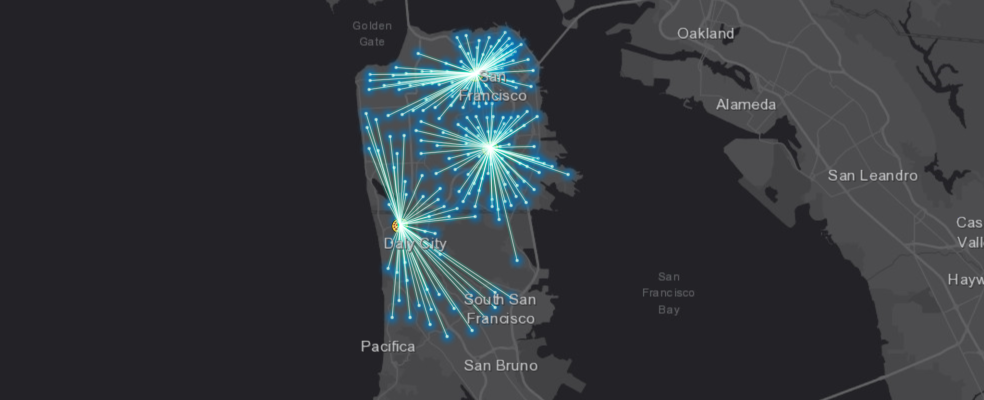

In [79]:
# Display the analysis results in a map.

# Create a map of Visalia, California.
map3 = my_gis.map('San Francisco, CA')
map3.basemap = 'dark-gray'
map3

In [78]:
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_locate_allocate_results(map3, result3, zoom_level=8)

In [80]:
item_properties['title'] = "Location Allocation example of Pizza Stores in San Francisco (4)"

item = map3.save(item_properties)
item

<Item title:"Location Allocation example of Pizza Stores in San Francisco (4)" type:Web Map owner:arcgis_python>

### A second solver in arcgis.features.find_locations module

Now let's look at a second solver in `arcgis.features` module that can also solve a location allocation problem, with a Feature service (input) to (Feature Service) approach. Parameters for this solver include:
 - `goal`: Required string. Specify the goal that must be satisfied when allocating demand locations to facilities. Choice list:[‘Allocate’, ‘MinimizeImpedance’, ‘MaximizeCoverage’, ‘MaximizeCapacitatedCoverage’, ‘PercentCoverage’]. Default value is ‘Allocate’.
 - `travel_mode`: Specify the mode of transportation for the analysis. Choice list: [‘Driving Distance’, ‘Driving Time’, ‘Rural Driving Distance’, ‘Rural Driving Time’, ‘Trucking Distance’, ‘Trucking Time’, ‘Walking Distance’, ‘Walking Time’]

In [44]:
%%time

result3b = find_locations.choose_best_facilities(goal="MinimizeImpedance",
                                                 demand_locations_layer=demand_points_fl,
                                                 travel_mode='Driving Distance',
                                                 travel_direction="DemandToFacility",
                                                 required_facilities_layer=existing_fl,
                                                 candidate_facilities_layer=candidate_fl,
                                                 candidate_count=3,
                                                 output_name="choose best facilities (5)")

Wall time: 1min 15s


In [45]:
result3b

<Item title:"choose best facilities (5)" type:Feature Layer Collection owner:arcgis_python>

In [53]:
location_allocation_sublayer = FeatureLayer.fromitem(result3b, layer_id=1)
la_df = location_allocation_sublayer.query(where='1=1', as_df=True)

# filter only the required columns
la_df2 = la_df[['CANFAC_NAME','DistanceToNetworkInMeters','FacilityID','FacilityOID','FacilityType','SourceID','SourceOID','AllocatedDemand', 'TotalTravelDistance','TotalWeightedTravelDistance']]
la_df2

,CANFAC_NAME,DistanceToNetworkInMeters,FacilityID,FacilityOID,FacilityType,SourceID,SourceOID,AllocatedDemand,TotalTravelDistance,TotalWeightedTravelDistance
0,None,67.050653,1,1,Required,1,6348813,37,62.855647,62.855647
1,Store_1,3.826533,1,2,Candidate,1,6332188,0,0.000000,0.000000
2,Store_2,7.804418,2,3,Candidate,1,6335980,0,0.000000,0.000000
3,Store_3,0.901644,3,4,Chosen,1,6340722,51,100.657299,100.657299
4,Store_4,3.832430,4,5,Candidate,1,6335279,0,0.000000,0.000000
5,Store_5,0.520565,5,6,Candidate,1,6337267,0,0.000000,0.000000
6,Store_6,4.803131,6,7,Candidate,1,6152175,0,0.000000,0.000000
7,Store_7,5.084506,7,8,Chosen,1,6156874,44,136.996648,136.996648
8,Store_11,2.783925,8,9,Candidate,1,6155185,0,0.000000,0.000000
9,Store_12,1.726517,9,10,Candidate,1,6159655,0,0.000000,0.000000



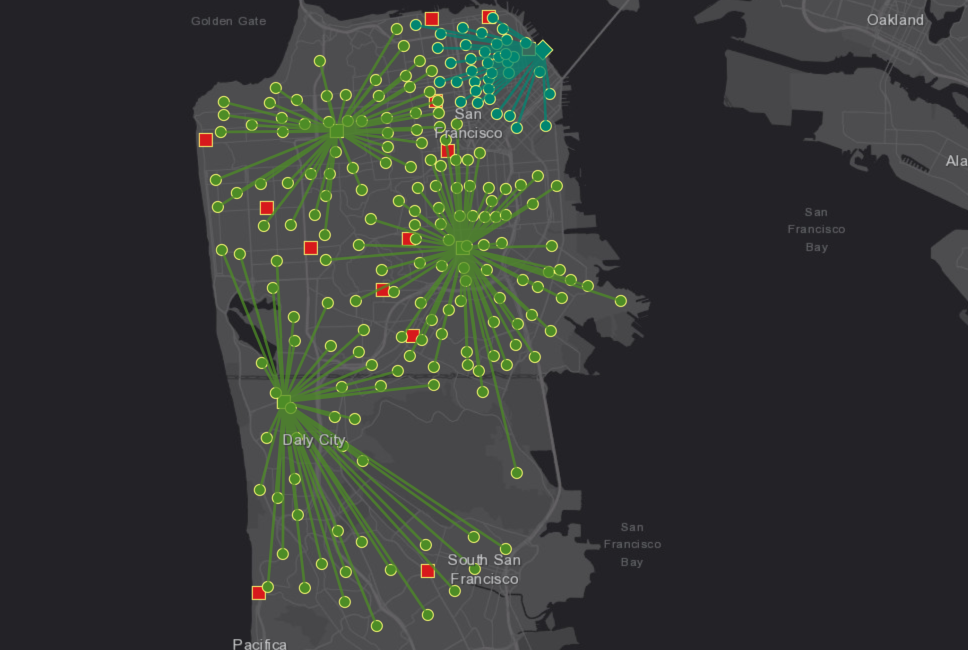

In [54]:
# Display the analysis results in a map.

# Create a map of Visalia, California.
map3b = my_gis.map('San Francisco, CA')
map3b.basemap = 'dark-gray'
map3b.layout.height = '650px'
map3b.legend = True
map3b

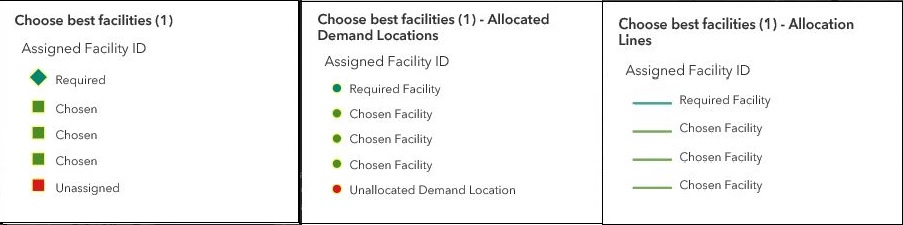
Fig 2. Legend for the three layers in the returned Feature Service.

The layer (id=0) contains required, chosen, and unassigned facilities, which as shown in the legend are displayed as blue diamonds, green rectangles, and red rectangles. We can see three chosen pizza store sites here (from the candidates).

The layer (id=1) contains the demand locations, and those to be covered or capacitated by the required facilities are assigned blue points (as their symbologies), those being covered by chosen facilities are assigned as green points, while those not supported by any facilities will be in red points. Here, all census tracts are tendered, and hence so red points are seen.

The last layer (id=2) contains the allocation lines connecting facilities to demand points. Again, lines connecting required facilities with demand points are represented in blue lines, those connecting chosen facilities with demand points are in green lines.

In [20]:
for i in range(3):
    map3b.add_layer(result3b.layers[i])

In the last section, we have adopted a different method - `arcgis.features.use_proximity.choose_best_facilities` - in allocating locations. In doing so, we also explored the scenario with output_name specified (which forms a Feature Service to Feature Service user experience).

## Conclusions

The ArcGIS Network Analysis module provides a versatile set of tools that assist strategic decision making to reduce the costs of travel. You have learned how the location-allocation analysis can be performed for four different problem types: `maximize attendance`, `maximize market share`, `target market share` and `Minimize Impedance`. However, examples shown in this part of guide only scratch the surface of the situations where you could use these tools. 

By performing your analysis using Python and the Jupyter Notebook, you also document your methodology in a form that can be easily shared to colleagues and stake holders, enabling them to reproduce your results or repeat the analyses in an iterative fashion with different parameters or different input datasets. You can also export the output tables from the `solve_location_allocation` tool by to tables, maps, or other deliverables <a href="#References"> [2]</a>.

## References

[1] "Location-allocation analysis layer", https://pro.arcgis.com/en/pro-app/help/analysis/networks/location-allocation-analysis-layer.htm, accessed on 10/09/2019

[2] "Identifying suitable sites for new ALS clinics using location allocation analysis", https://developers.arcgis.com/python/sample-notebooks/identifying-suitable-sites-for-als-clinics-using-location-allocation-analysis/, accessed 10/09/2019

[3] "Asynchronous network analysis services", https://developers.arcgis.com/python/guide/performing-network-analysis-tasks-asynchronously/, accessed on 10/09/2019

[4] "Exercise 9: Choosing optimal store locations using location-allocation", https://desktop.arcgis.com/en/arcmap/latest/extensions/network-analyst/exercise-9-choosing-optimal-store-sites-using-location-allocation.htm, accessed on 10/10/2019

[5] "SolveLocationAllocation", https://logistics.arcgis.com/arcgis/rest/directories/arcgisoutput/World/LocationAllocation_GPServer/World_LocationAllocation/SolveLocationAllocation.htm, accessed on 10/10/2019